In [1]:
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
import PIL.Image as Image
from keras.models import Sequential # Our first model takes just a little bit to run (def more than one minute)
from keras.layers import Dense # However, collab did not do very good for our model so I suggest running this on jupyter notebook
from keras.layers import MaxPooling2D, BatchNormalization
%matplotlib inline

In [2]:
Animaldir = "raw-img" #Image local directories
Test_Animal_dir = 'raw2-img'

In [3]:
batch_size = 32
img_height_m4 = 256 #Our second input of images at a larger size
img_width_m4 = 256
img_size_m4 = (256,256)

train_animals_m4 = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  subset="training",
  shuffle = True,
  seed = 123,
  image_size=img_size_m4,
  batch_size=batch_size)

val_animals_m4 = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  shuffle = True,
  seed = 123,
  subset="validation",
  image_size=img_size_m4,
  batch_size=batch_size)

Found 18686 files belonging to 10 classes.
Using 14949 files for training.
Found 18686 files belonging to 10 classes.
Using 3737 files for validation.


In [6]:
class_names = np.array(train_animals_m4.class_names) #Gets the array of class names
num_classes = len(class_names)

In [7]:
data_augmentation_v2 = keras.Sequential( #another data augmentation module
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height_m4,
                                  img_width_m4,
                                   3)),
     layers.RandomRotation(0.2),
     layers.RandomZoom(0.1),    
  ]
)

In [8]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm #Adds 2 more layers of filters. Intermediate and end dropout
model_4 = Sequential([
  data_augmentation_v2,
  layers.Rescaling(1./255, input_shape=(img_height_m4, img_width_m4, 3)), #Kernal Constraints and data augmentation added
  layers.Conv2D(16, (3,3), padding='same', activation='relu',kernel_constraint=max_norm(3.)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu',kernel_constraint=max_norm(3.)), #Don't try to run this takes hours
  layers.MaxPooling2D(),
  layers.Dropout(0.5),  
  layers.Conv2D(64, (5,5), padding='same', activation='relu',kernel_constraint=max_norm(3.)),
  layers.MaxPooling2D(), 
  layers.Conv2D(128, (5,5), padding='same', activation='relu',kernel_constraint=max_norm(3.)),  
  layers.MaxPooling2D(), 
  layers.Conv2D(256, (3,3), padding='same', activation='relu',kernel_constraint=max_norm(3.)),  
  layers.MaxPooling2D(),   
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),  
  layers.Dense(num_classes)
])

model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [9]:
results_4 = model_4.fit(train_animals_m4, #Takes hours to run
                    epochs=30,
                    validation_data=val_animals_m4,
                       callbacks=[early])

Epoch 1/30
468/468 [==============================] - 388s 827ms/step - loss: 2.1585 - accuracy: 0.1973 - val_loss: 1.9597 - val_accuracy: 0.2914
Epoch 2/30
468/468 [==============================] - 386s 824ms/step - loss: 1.8717 - accuracy: 0.3311 - val_loss: 1.7736 - val_accuracy: 0.3773
Epoch 3/30
468/468 [==============================] - 384s 820ms/step - loss: 1.6440 - accuracy: 0.4180 - val_loss: 1.5981 - val_accuracy: 0.4493
Epoch 4/30
468/468 [==============================] - 389s 831ms/step - loss: 1.4915 - accuracy: 0.4763 - val_loss: 1.6402 - val_accuracy: 0.4485
Epoch 5/30
468/468 [==============================] - 406s 866ms/step - loss: 1.4033 - accuracy: 0.5114 - val_loss: 1.3722 - val_accuracy: 0.5264
Epoch 6/30
468/468 [==============================] - 420s 897ms/step - loss: 1.3361 - accuracy: 0.5338 - val_loss: 1.3907 - val_accuracy: 0.5221
Epoch 7/30
468/468 [==============================] - 420s 896ms/step - loss: 1.2765 - accuracy: 0.5580 - val_loss: 1.2789 -

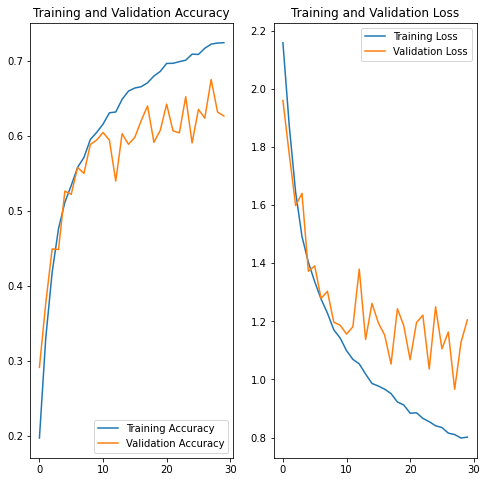

In [10]:
acc = results_4.history['accuracy'] #Plotting performance
val_acc = results_4.history['val_accuracy']

loss = results_4.history['loss']
val_loss = results_4              .history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()